In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('/content/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x = dataset[['Pregnancies','Insulin','BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction']]
y = dataset.Outcome

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [6]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=200)

In [7]:
log_reg.fit(xtrain,ytrain)
ypred=log_reg.predict(xtest)

In [10]:
from sklearn import metrics
cm = metrics.confusion_matrix(ytest, ypred)
cm

array([[118,  12],
       [ 26,  36]])

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(33.0, 0.5, 'Actual label')

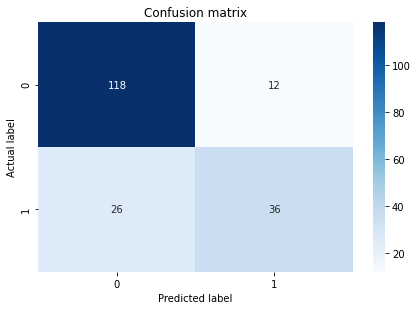

In [13]:
class_names =[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Blues" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [14]:
print("Accuracy:",metrics.accuracy_score(ytest, ypred))
print("Precision:",metrics.precision_score(ytest, ypred))
print("Recall:",metrics.recall_score(ytest, ypred))
print("F1 Score:",metrics.f1_score(ytest, ypred))

Accuracy: 0.8020833333333334
Precision: 0.75
Recall: 0.5806451612903226
F1 Score: 0.6545454545454547
